In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from pandas import Series, DataFrame

%matplotlib inline

In [3]:
# 看看数据概况
poll_df = pd.read_csv('2016-us-ge-poll.csv', sep='	')
poll_df.info()
poll_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 16 columns):
Trump                   1905 non-null float64
Clinton                 1905 non-null float64
Johnson                 793 non-null float64
Other                   1448 non-null float64
Undecided               1755 non-null float64
poll_slug               1905 non-null object
survey_house            1905 non-null object
start_date              1905 non-null object
end_date                1905 non-null object
question_text           783 non-null object
sample_subpopulation    1905 non-null object
observations            1290 non-null float64
margin_of_error         739 non-null float64
mode                    1905 non-null object
partisanship            1905 non-null object
partisan_affiliation    1905 non-null object
dtypes: float64(7), object(9)
memory usage: 238.2+ KB


,Trump,Clinton,Johnson,Other,Undecided,poll_slug,survey_house,start_date,end_date,question_text,sample_subpopulation,observations,margin_of_error,mode,partisanship,partisan_affiliation
0,41.0,45.0,4.0,2.0,8.0,insights-west-26812,Insights West,2016-11-04,2016-11-07,"As you may know, there will be a presidential ...",Likely Voters,940.0,3.2,Internet,Nonpartisan,None
1,6.0,89.0,1.0,0.0,4.0,insights-west-26812,Insights West,2016-11-04,2016-11-07,"As you may know, there will be a presidential ...",Likely Voters - Democrat,NaN,NaN,Internet,Nonpartisan,None
2,82.0,7.0,3.0,2.0,6.0,insights-west-26812,Insights West,2016-11-04,2016-11-07,"As you may know, there will be a presidential ...",Likely Voters - Republican,NaN,NaN,Internet,Nonpartisan,None
3,38.0,43.0,8.0,4.0,7.0,insights-west-26812,Insights West,2016-11-04,2016-11-07,"As you may know, there will be a presidential ...",Likely Voters - independent,NaN,NaN,Internet,Nonpartisan,None
4,43.0,41.0,7.0,4.0,5.0,ibd-tipp-26811,IBD/TIPP,2016-11-04,2016-11-07,NaN,Likely Voters,1107.0,3.1,Live Phone,Nonpartisan,None


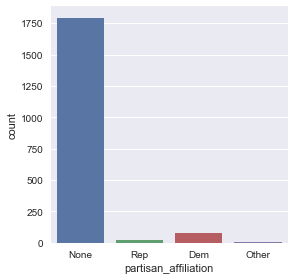

In [20]:
# 查看党派偏向性，大部分都是吃瓜群众。
# 调查人群民主党支持者明显多于共和党。
sns.factorplot('partisan_affiliation', data=poll_df, kind='count')

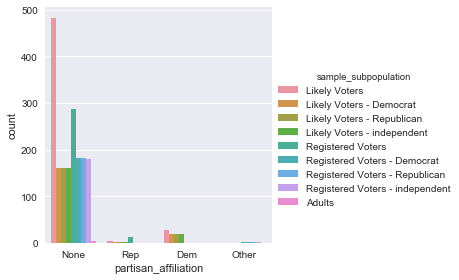

In [21]:
# 人群倾向分析
# 根据hue参数指定的列绘制多条曲线
sns.factorplot('partisan_affiliation',data=poll_df,hue='sample_subpopulation',kind="count")

None     1794
Dem        81
Rep        22
Other       8
Name: partisan_affiliation, dtype: int64


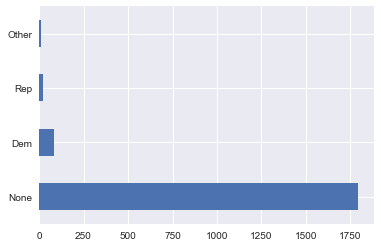

In [9]:
col_data = poll_df.partisan_affiliation
data = col_data.value_counts()
print(data)
data.plot(kind='barh')
# poll_df.partisan_affiliation.value_counts().plot('bar')

In [6]:
# 平均值
# m = poll_df.mean()
# print(type(m))
avg = pd.DataFrame(poll_df.mean())
print(avg)
avg.drop('observations', axis=0, inplace=True) # 扔掉不需要的2行
avg.drop('margin_of_error', axis=0, inplace=True)
avg

                           0
Trump              41.247769
Clinton            43.343832
Johnson             7.644388
Other               5.434392
Undecided           8.781197
observations     1739.319380
margin_of_error     3.223369


,0
Trump,41.247769
Clinton,43.343832
Johnson,7.644388
Other,5.434392
Undecided,8.781197


In [24]:
# 标准差
std = pd.DataFrame(poll_df.std())
std.drop('observations', axis=0, inplace=True) # 扔掉不需要的2行
std.drop('margin_of_error', axis=0, inplace=True)
std

,0
Trump,22.673688
Clinton,24.248514
Johnson,4.513688
Other,4.652972
Undecided,6.118368


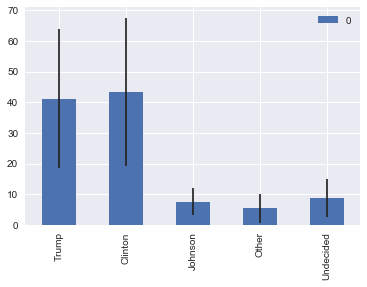

In [25]:
avg.plot(yerr=std,kind='bar',legend=True) # legend=False：不加标注

In [26]:
poll_stat = pd.concat([avg, std], axis=1) # 按列连接2个df
poll_stat.columns = ['avg', 'std']
poll_stat

,avg,std
Trump,41.247769,22.673688
Clinton,43.343832,24.248514
Johnson,7.644388,4.513688
Other,5.434392,4.652972
Undecided,8.781197,6.118368


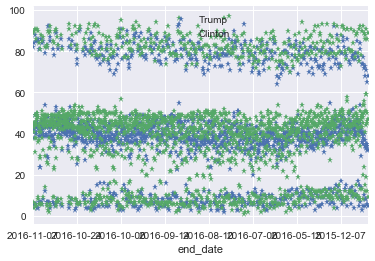

In [27]:
# 查看不同截至日期民调数据对比
poll_df.plot(x='end_date', y=['Trump', 'Clinton'], marker='*', linestyle='')

In [28]:
# 添加一列，比较Trump和Clinton的差距
poll_df['difference'] = (poll_df.Trump - poll_df.Clinton) / 100
poll_df['difference'].head()

0   -0.04
1   -0.83
2    0.75
3   -0.05
4    0.02
Name: difference, dtype: float64

In [29]:
# 根据开始日期取平均值
poll_df = poll_df.groupby(['start_date'],as_index=False).mean()
poll_df.head()

,start_date,Trump,Clinton,Johnson,Other,Undecided,observations,margin_of_error,difference
0,2015-05-19,34.25,48.75,NaN,2.5,14.00,1046.00,3.266667,-0.1450
1,2015-06-20,35.00,47.25,NaN,NaN,17.75,420.75,NaN,-0.1225
2,2015-06-21,34.00,51.00,NaN,3.0,12.00,1005.00,3.000000,-0.1700
3,2015-06-26,36.75,57.00,NaN,6.0,0.00,890.00,3.500000,-0.2025
4,2015-07-09,35.25,49.50,NaN,NaN,16.00,499.25,3.000000,-0.1425


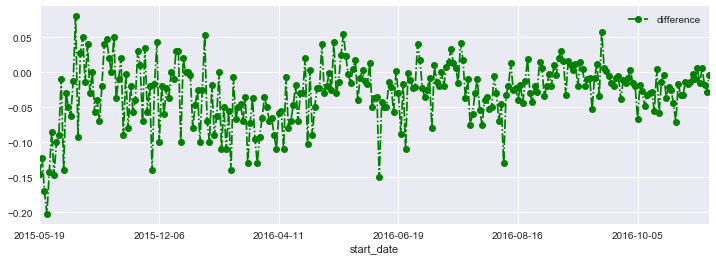

In [33]:
# 差距变化率的变化趋势，虽然Trump一直落后，但是差距一点点在收敛。
poll_df.plot('start_date','difference',figsize=(12,4),marker='o',linestyle='-.',color='g')

In [40]:
# 计算辩论在那几天发生
# 第一次：2016-09-27 (216 + 26)
# 第二次：2016-10-09 (216 + 29 + 9)
# 第三次：2016-10-19 (216 + 29 + 19)
i = 0
for sd in poll_df['start_date']:
    if sd == '2016-09-01':
        print(i)
    elif sd == '2016-10-31':
        print(i)
        break
    i += 1

216
276


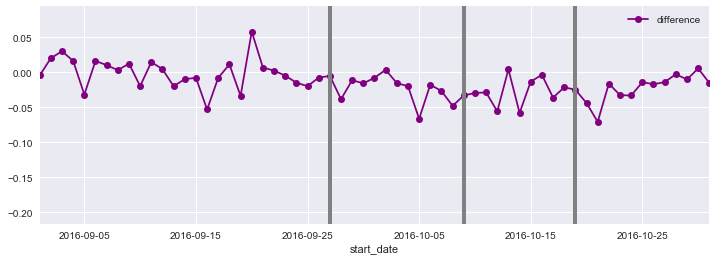

In [43]:
# 查看辩论对支持率的影响
poll_df.plot('start_date','difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(216,276))
plt.axvline(x=216+26, linewidth=4, color='grey')
plt.axvline(x=216+29+9, linewidth=4, color='grey')
plt.axvline(x=216+29+19, linewidth=4, color='grey')